# Lab 5: Neural Networks for text

In [3]:
# Global imports and settings
from preamble import *
import tensorflow.keras as keras
print("Using Keras",keras.__version__)
%matplotlib inline
plt.rcParams['figure.dpi'] = 125 # Use 300 for PDF, 100 for slides
# InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

Using Keras 2.2.4-tf


Before you start, read the Tutorial for this lab ('Deep Learning with Python')

## Exercise 1: Sentiment Analysis
* Take the IMDB dataset from keras.datasets with 10000 words and the default train-test-split

In [4]:
from tensorflow.keras.datasets import imdb
# Download IMDB data with 10000 most frequent words
word_index = imdb.get_word_index()
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

for i in [0,5,10]:
    print("Review {}:".format(i),' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]][0:20]))

Review 0: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you
Review 5: ? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes
Review 10: ? french horror cinema has seen something of a revival over the last couple of years with great films such


* Vectorize the reviews using one-hot-encoding (see tutorial for helper code) 

In [9]:
# Custom implementation of one-hot-encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# Convert 0/1 labels to float
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')



* Build a network of 2 _Dense_ layers with 16 nodes each and the _ReLU_ activation function.
* Use cross-entropy as the loss function, RMSprop as the optimizer, and accuracy as the evaluation metric.

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers 

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* Plot the learning curves, using the first 10000 samples as the validation set and the rest as the training set.
* Use 20 epochs and a batch size of 512

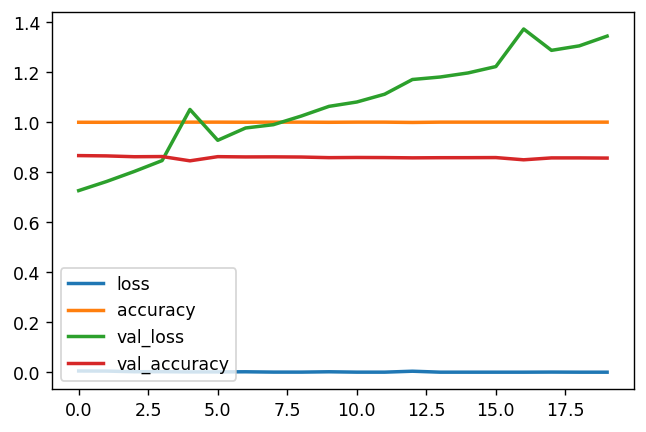

In [11]:
x_val, partial_x_train = x_train[:10000], x_train[10000:]
y_val, partial_y_train = y_train[:10000], y_train[10000:] 
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val))

# Using pandas' built-in plotting of series
pd.DataFrame(history.history).plot(lw=2);

* Retrain the model, this time using early stopping to stop training at the optimal time
* Evaluate on the test set and report the accuracy

In [12]:
# Based on the figure, we should stop after 4 epochs
model.fit(x_train, y_train, epochs=4, batch_size=512, verbose=0)
result = model.evaluate(x_test, y_test)
print("Loss: {:.4f}, Accuracy:  {:.4f}".format(*result))

25000/25000 [==============================] - 14s 551us/sample - loss: 0.5052 - accuracy: 0.8556
Loss: 0.5052, Accuracy:  0.8556


* Try to manually improve the score and explain what you observe. E.g. you could:
    - Try 3 hidden layers
    - Change to a higher learning rate (e.g. 0.4)
    - Try another optimizer (e.g. Adagrad)
    - Use more or fewer hidden units (e.g. 64)
    - `tanh` activation instead of `ReLU`

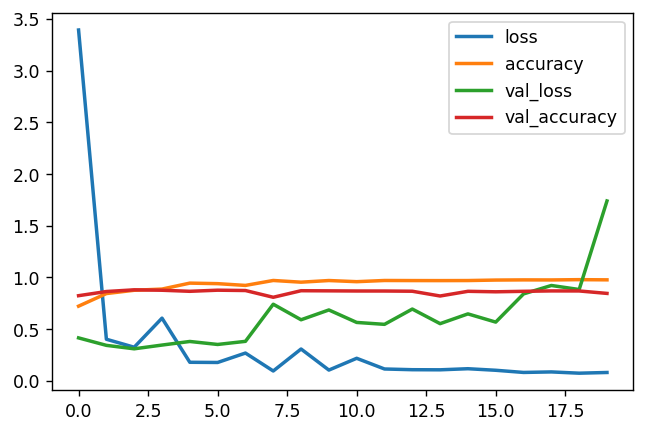

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_val, partial_x_train = x_train[:10000], x_train[10000:]
y_val, partial_y_train = y_train[:10000], y_train[10000:] 
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512, verbose=0,
                    validation_data=(x_val, y_val))

# Using pandas' built-in plotting of series
pd.DataFrame(history.history).plot(lw=2);

* Tune the results by doing a grid search for the most interesting hyperparameters
    * Tune the learning rate between 0.001 and 1
    * Tune the number of epochs between 1 and 20
    * Use only 3-4 values for each

## Exercise 2: Topic classification
* Take the Reuters dataset from keras.datasets with 10000 words and the default train-test-split

In [64]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

for i in [0,5,10]:
    print("News wire {}:".format(i),
          ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[i]]))
    # Note that our indices were offset by 3

News wire 0: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
News wire 5: ? the u s agriculture department estimated canada's 1986 87 wheat crop at 31 85 mln tonnes vs 31 85 mln tonnes last month it estimated 1985 86 output at 24 25 mln tonnes vs 24 25 mln last month canadian 1986 87 coarse grain production is projected at 27 62 mln tonnes vs 27 62 mln tonnes last month production in 1985 86 is estimated at 24 95 mln tonnes vs 24 95 mln last month canadian wheat exports in 1986 87 are forecast at 19 00 mln tonnes vs 18 00 mln tonnes last month exports in 1985 86 are estimated at 17 71 mln tonnes vs 17 72 mln last month reuter 3
News wire 10: ? period

* Vectorize the data and the labels using one-hot-encoding

* Build a network with 2 dense layers of 64 nodes each
* Make sensible choices about the activation functions, loss, ...

* Take a validation set from the first 1000 points of the training set
* Fit the model with 20 epochs and a batch size of 512
* Plot the learning curves

* Create an information bottleneck: rebuild the model, but now use only 4 hidden units in the second layer. Evaluate the model. Does it still perform well?

## Exercise 3: Regularization
* Go back to the IMDB dataset
* Retrain with only 4 units per layer
* Plot the results. What do you observe?

* Use 16 hidden nodes in the layers again, but now add weight regularization. Use L2 loss with alpha=0.001. What do you observe?

* Add a drop out layer after every dense layer. Use a dropout rate of 0.5. What do you observe?

## Exercise 4: Word embeddings

* Instead of one-hot-encoding, use a word embedding of length 300
* Only add an output layer after the Embedding layer.
* Train the embedding as well as you can (takes time!)
    * Evaluate as before. Does it perform better?
* Import a GloVe embedding pretrained om Wikipedia
    * Evaluate as before. Does it perform better?